# Projeto de Machine Learning - Predição de Diabetes

**Objetivo**: Implementar uma esteira completa de aprendizado de máquina seguindo os 9 requisitos:

✅ **1. Dataset UCI/Kaggle**: Pima Indians Diabetes Dataset

✅ **2. Estatísticas descritivas** gerais da base

✅ **3. Transformação em colunas** (balanceamento de classes)

✅ **4. Transformação em linhas** (remoção de valores inconsistentes)

✅ **5. Três subconjuntos**: treino, validação e teste

✅ **6. Treinamento e avaliação** do modelo

✅ **7. Matriz de confusão e acurácia**

✅ **8. Predição** com modelo implantado

✅ **9. Comentários passo a passo** para fins educacionais

---

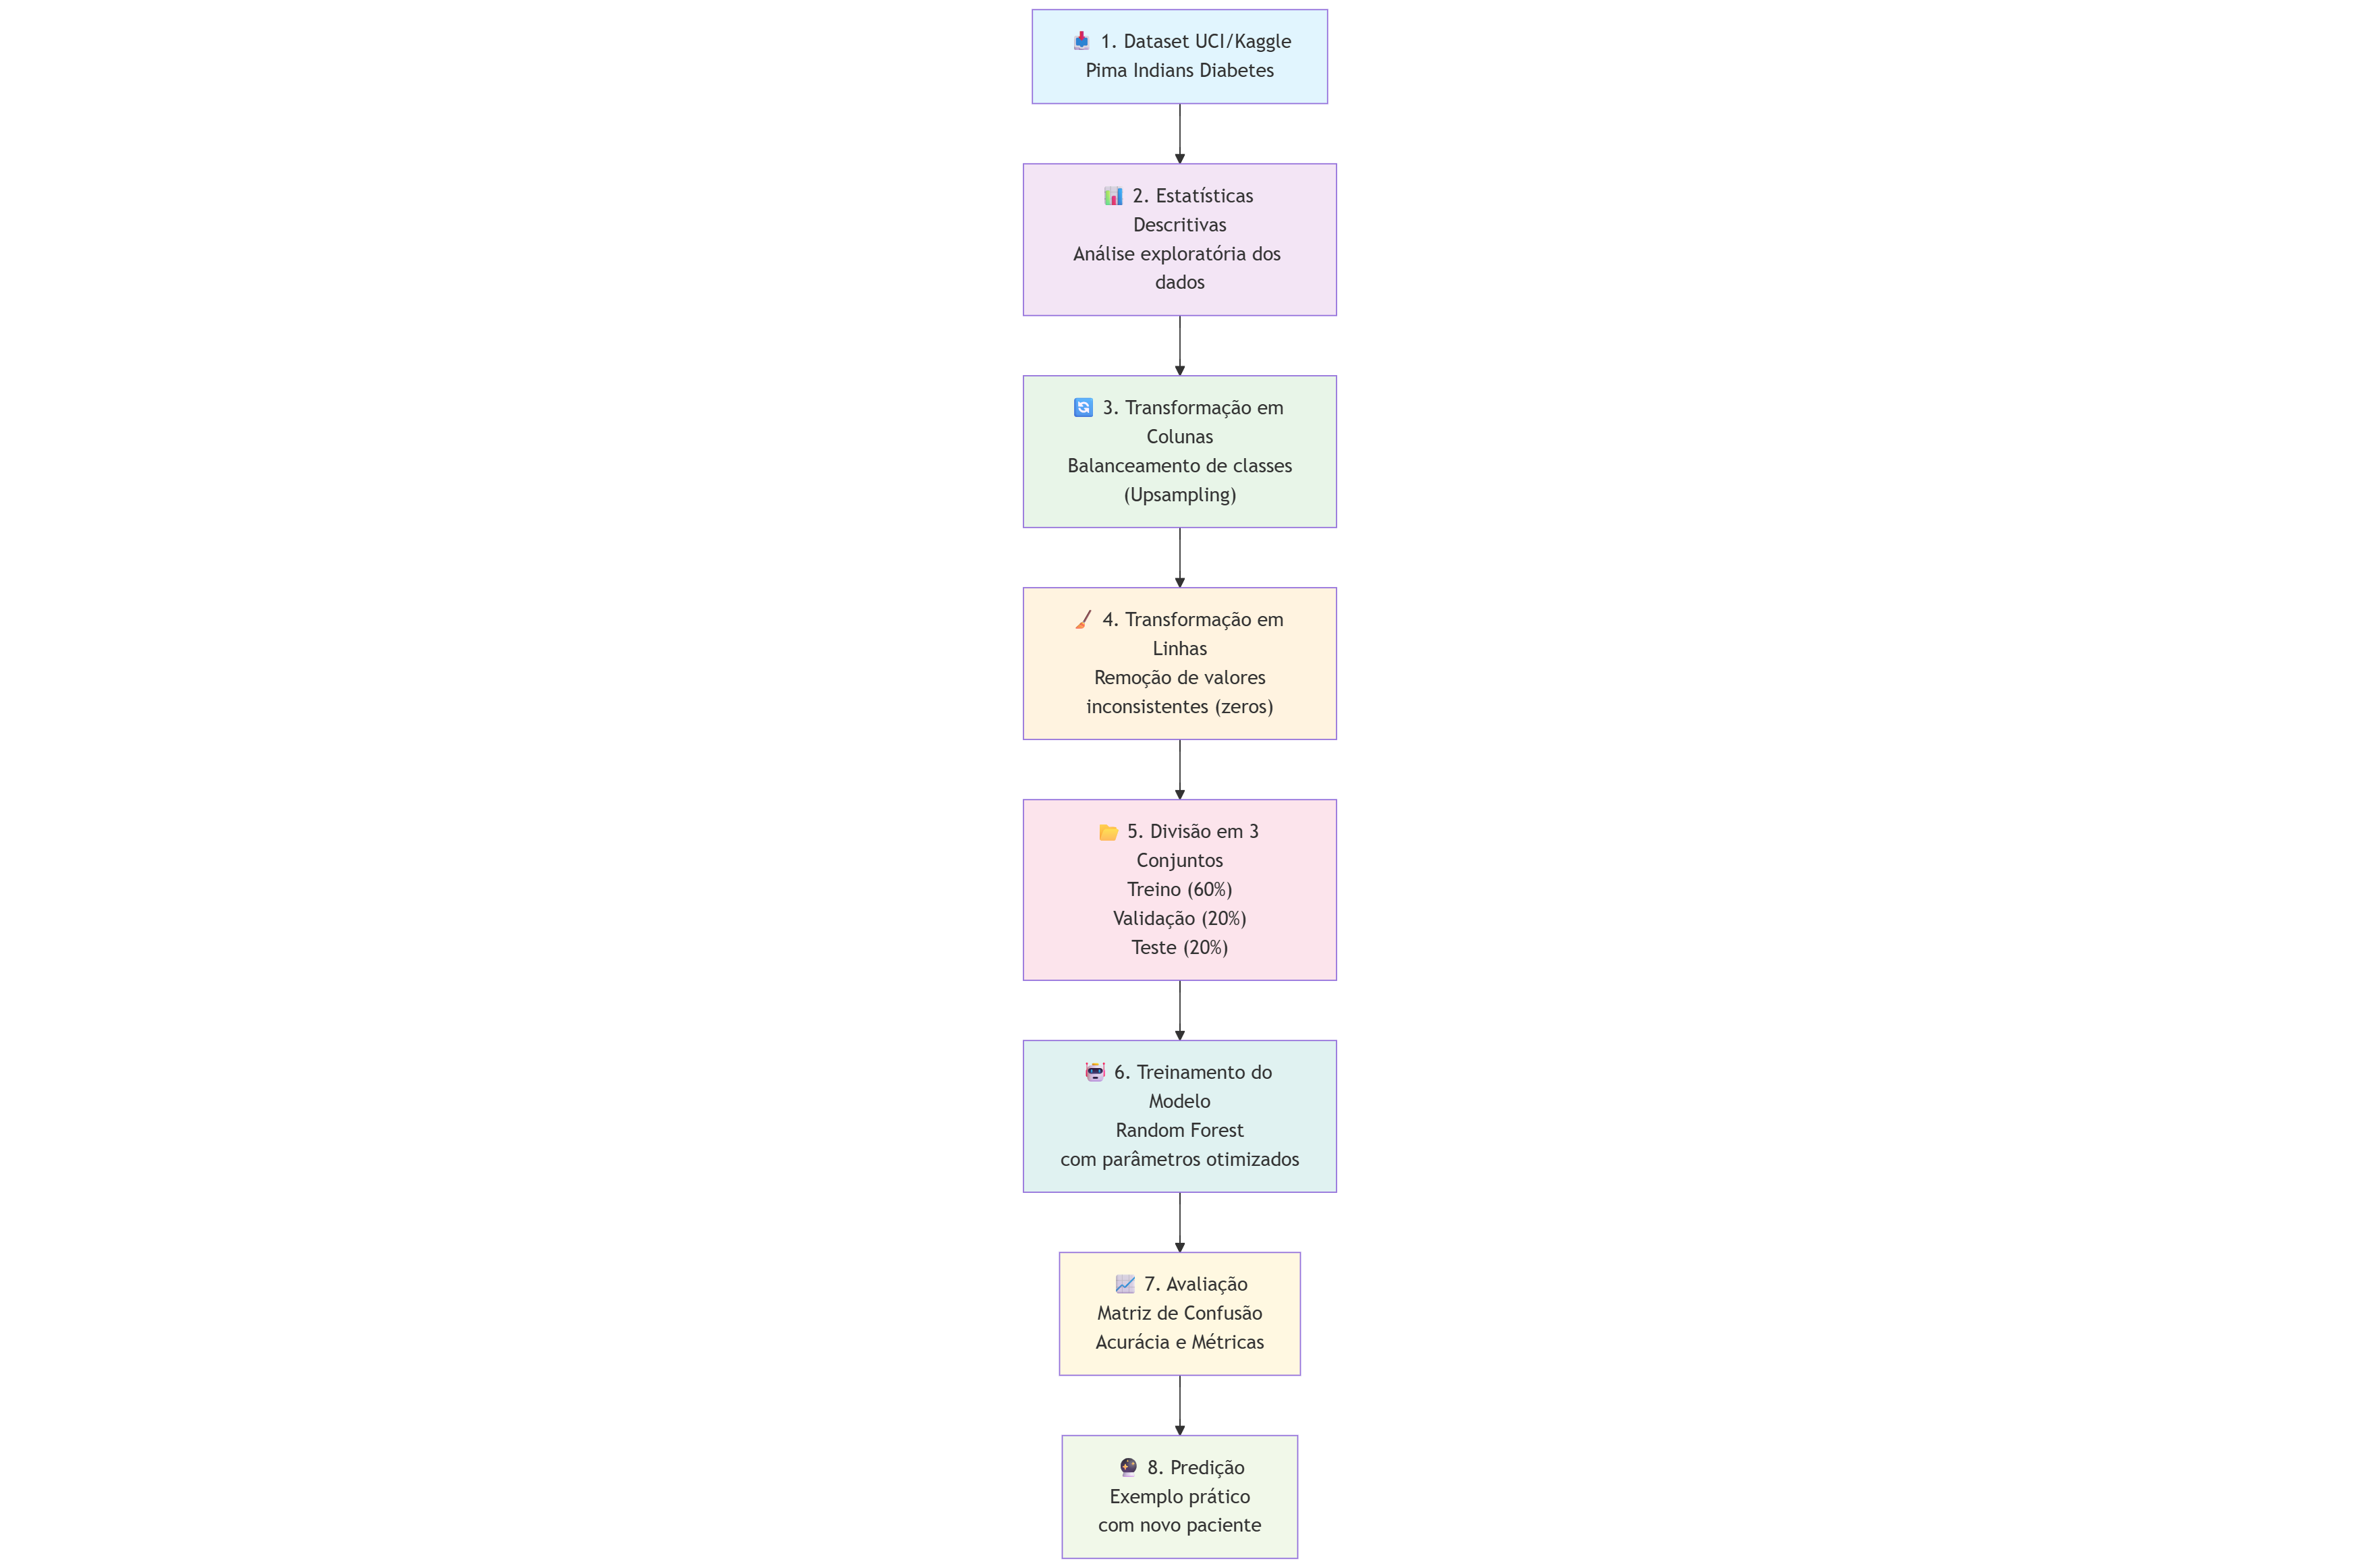

**Justificativa da Metodologia:**
- **Estrutura sequencial**: Cada etapa depende da anterior
- **Validação rigorosa**: Três conjuntos garantem avaliação confiável
- **Tratamento de dados**: Balanceamento e limpeza melhoram a qualidade
- **Interpretabilidade**: Foco em explicações para fins educacionais

---

## 1. Importação de Bibliotecas

**Por que fazer**: Precisamos importar as ferramentas necessárias para:
- Manipular dados (pandas, numpy)
- Visualizar informações (matplotlib, seaborn)
- Criar e avaliar modelos de ML (sklearn)

In [2]:
# Importando bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Importando bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Importando bibliotecas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Configurações de visualização
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style('whitegrid')

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 2. Carregamento e Visualização Inicial do Dataset

**Requisito 1**: Escolher dataset do UCI ou Kaggle

**Dataset escolhido**: Pima Indians Diabetes Dataset
- **Origem**: UCI Machine Learning Repository
- **Objetivo**: Predizer se uma pessoa tem diabetes
- **Variáveis**: 8 características médicas + 1 variável alvo (Outcome)

In [ ]:
# Carregando o dataset Pima Indians Diabetes do UCI
# Fonte: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)

print(f"Dataset carregado: {df.shape[0]} linhas e {df.shape[1]} colunas")
print("\n📋 Primeiras 5 linhas do dataset:")
print(df.head())

print("\n📊 Informações das colunas:")
print(df.info())

print("\n🏷️ Significado das colunas:")
print("- Pregnancies: Número de gestações")
print("- Glucose: Concentração de glicose")
print("- BloodPressure: Pressão arterial")
print("- SkinThickness: Espessura da pele")
print("- Insulin: Nível de insulina")
print("- BMI: Índice de massa corporal")
print("- DiabetesPedigreeFunction: Função de hereditariedade")
print("- Age: Idade")
print("- Outcome: 0 = Não diabético, 1 = Diabético")

Dataset carregado: 768 linhas e 9 colunas

📋 Primeiras 5 linhas do dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

📊 Informações das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    ---------

## 3. Estatísticas Descritivas

**Requisito 2**: Apresentar estatísticas descritivas gerais

**Por que fazer**: Para entender a distribuição dos dados, identificar possíveis problemas e orientar as transformações necessárias.

In [ ]:
# Estatísticas descritivas gerais
print("📊 ESTATÍSTICAS DESCRITIVAS COMPLETAS:")
print(df.describe())

# Verificando valores ausentes
print("\n🔍 VALORES AUSENTES:")
print(df.isnull().sum())

# Distribuição da variável alvo (Outcome)
print("\n🎯 DISTRIBUIÇÃO DA VARIÁVEL ALVO:")
print(df['Outcome'].value_counts())
print(f"Proporção: {df['Outcome'].value_counts(normalize=True)}")

# Visualizando a distribuição das classes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', hue='Outcome', palette='viridis', legend=False)
plt.title('Distribuição das Classes')
plt.xlabel('Outcome (0=Não Diabético, 1=Diabético)')
plt.ylabel('Quantidade')
plt.show()

# Verificando valores zero problemáticos
print("\n⚠️ VALORES ZERO PROBLEMÁTICOS:")
print("(Valores zero podem ser inconsistentes em algumas variáveis médicas)")
cols_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_zero:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} valores zero ({zero_count/len(df)*100:.1f}%)")

: 

## 4. Transformações nos Dados

**Requisitos 3 e 4**: Aplicar transformações em colunas e linhas

### 4.1 Transformação em Colunas: Balanceamento de Classes
**Por que fazer**: O dataset está desbalanceado (mais não-diabéticos que diabéticos). Isso pode fazer o modelo tender a sempre prever "não diabético".

In [ ]:
# TRANSFORMAÇÃO EM COLUNAS: Balanceamento das classes
print("🔄 TRANSFORMAÇÃO EM COLUNAS: Balanceamento")
print("\nAntes do balanceamento:")
print(df['Outcome'].value_counts())

# Separando classes majoritária e minoritária
df_majority = df[df.Outcome == 0]  # Não diabéticos
df_minority = df[df.Outcome == 1]  # Diabéticos

# Aumentando a classe minoritária (upsampling)
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                replace=True,     # permite repetição
                                n_samples=len(df_majority),  # mesmo tamanho da majoritária
                                random_state=42)  # para reprodutibilidade

# Combinando as classes balanceadas
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print("\nApós o balanceamento:")
print(df_balanced['Outcome'].value_counts())
print(f"\n✅ Classes balanceadas: {len(df_balanced)} registros total")

🔄 TRANSFORMAÇÃO EM COLUNAS: Balanceamento

Antes do balanceamento:
Outcome
0    500
1    268
Name: count, dtype: int64

Após o balanceamento:
Outcome
0    500
1    500
Name: count, dtype: int64

✅ Classes balanceadas: 1000 registros total


### 4.2 Transformação em Linhas: Remoção de Valores Inconsistentes
**Por que fazer**: Valores zero em variáveis como Glucose, BloodPressure e BMI são medicamente impossíveis e podem prejudicar o modelo.

In [ ]:
# TRANSFORMAÇÃO EM LINHAS: Remoção de valores inconsistentes
print("🔄 TRANSFORMAÇÃO EM LINHAS: Limpeza")
print(f"\nTamanho antes da limpeza: {len(df_balanced)} registros")

# Removendo registros com valores zero nas variáveis críticas
# (valores zero são medicamente impossíveis nessas variáveis)
df_clean = df_balanced.copy()

# Variáveis onde zero é problemático
cols_to_clean = ['Glucose', 'BloodPressure', 'BMI']

print("\nRemovendo valores zero das variáveis críticas:")
for col in cols_to_clean:
    before = len(df_clean)
    df_clean = df_clean[df_clean[col] > 0]
    removed = before - len(df_clean)
    print(f"- {col}: {removed} registros removidos")

print(f"\nTamanho após a limpeza: {len(df_clean)} registros")
print(f"Registros removidos: {len(df_balanced) - len(df_clean)} ({(len(df_balanced) - len(df_clean))/len(df_balanced)*100:.1f}%)")

print("\n✅ Dados limpos e prontos para modelagem!")

🔄 TRANSFORMAÇÃO EM LINHAS: Limpeza

Tamanho antes da limpeza: 1000 registros

Removendo valores zero das variáveis críticas:
- Glucose: 6 registros removidos
- BloodPressure: 44 registros removidos
- BMI: 4 registros removidos

Tamanho após a limpeza: 946 registros
Registros removidos: 54 (5.4%)

✅ Dados limpos e prontos para modelagem!


## 5. Divisão em Conjuntos: Treino, Validação e Teste

**Requisito 5**: Criar três subconjuntos

**Por que fazer**: 
- **Treino**: Para ensinar o modelo
- **Validação**: Para ajustar parâmetros
- **Teste**: Para avaliar performance final (dados "nunca vistos")

In [ ]:
# Separando variáveis independentes (X) e dependente (y)
X = df_clean.drop('Outcome', axis=1)  # Todas as colunas exceto Outcome
y = df_clean['Outcome']                # Apenas a coluna Outcome

print("📊 DIVISÃO EM TRÊS CONJUNTOS")
print(f"\nDados originais: {len(X)} registros")

# Primeira divisão: 80% para treino+validação, 20% para teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% para teste
    random_state=42,    # para reprodutibilidade
    stratify=y          # mantém proporção das classes
)

# Segunda divisão: dividir os 80% restantes em treino (60%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,     # 25% de 80% = 20% do total
    random_state=42,
    stratify=y_temp
)

# Exibindo os tamanhos finais
print(f"\n📋 TAMANHOS DOS CONJUNTOS:")
print(f"Treino:    {len(X_train)} registros ({len(X_train)/len(X)*100:.0f}%)")
print(f"Validação: {len(X_val)} registros ({len(X_val)/len(X)*100:.0f}%)")
print(f"Teste:     {len(X_test)} registros ({len(X_test)/len(X)*100:.0f}%)")

# Verificando distribuição das classes em cada conjunto
print(f"\n🎯 DISTRIBUIÇÃO DAS CLASSES:")
print(f"Treino:    Classe 0: {(y_train==0).sum()}, Classe 1: {(y_train==1).sum()}")
print(f"Validação: Classe 0: {(y_val==0).sum()}, Classe 1: {(y_val==1).sum()}")
print(f"Teste:     Classe 0: {(y_test==0).sum()}, Classe 1: {(y_test==1).sum()}")

print("\n✅ Dados divididos com sucesso!")

📊 DIVISÃO EM TRÊS CONJUNTOS

Dados originais: 946 registros

📋 TAMANHOS DOS CONJUNTOS:
Treino:    567 registros (60%)
Validação: 189 registros (20%)
Teste:     190 registros (20%)

🎯 DISTRIBUIÇÃO DAS CLASSES:
Treino:    Classe 0: 285, Classe 1: 282
Validação: Classe 0: 95, Classe 1: 94
Teste:     Classe 0: 95, Classe 1: 95

✅ Dados divididos com sucesso!


## 6. Treinamento e Avaliação do Modelo

**Requisito 6**: Realizar treinamento e avaliação

**Modelo escolhido**: Random Forest
**Por que**: É robusto, lida bem com diferentes tipos de dados e oferece boa interpretabilidade.

In [ ]:
# Criando e treinando o modelo Random Forest
print("🤖 TREINAMENTO DO MODELO")

# Inicializando o modelo
modelo = RandomForestClassifier(
    n_estimators=100,   # Número de árvores na floresta
    max_depth=10,       # Profundidade máxima das árvores
    random_state=42     # Para reprodutibilidade
)

print("\nParâmetros do modelo:")
print(f"- Número de árvores: {modelo.n_estimators}")
print(f"- Profundidade máxima: {modelo.max_depth}")
print(f"- Critério de divisão: {modelo.criterion}")

# Treinando o modelo
print("\n🔄 Treinando modelo...")
modelo.fit(X_train, y_train)
print("✅ Modelo treinado com sucesso!")

# Fazendo predições no conjunto de validação
y_val_pred = modelo.predict(X_val)
print(f"\n📊 Predições realizadas no conjunto de validação ({len(X_val)} amostras)")

# Avaliando performance na validação
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n🎯 Acurácia na Validação: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

print("\n📋 Relatório de Classificação (Validação):")
print(classification_report(y_val, y_val_pred))

🤖 TREINAMENTO DO MODELO

Parâmetros do modelo:
- Número de árvores: 100
- Profundidade máxima: 10
- Critério de divisão: gini

🔄 Treinando modelo...
✅ Modelo treinado com sucesso!

📊 Predições realizadas no conjunto de validação (189 amostras)

🎯 Acurácia na Validação: 0.8413 (84.13%)

📋 Relatório de Classificação (Validação):
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        95
           1       0.80      0.90      0.85        94

    accuracy                           0.84       189
   macro avg       0.85      0.84      0.84       189
weighted avg       0.85      0.84      0.84       189



## 7. Matriz de Confusão e Acurácia

**Requisito 7**: Apresentar matriz de confusão e acurácia

**Por que**: A matriz de confusão mostra em detalhes os acertos e erros do modelo, permitindo identificar se ele confunde mais uma classe com a outra.

🔍 AVALIAÇÃO FINAL NO CONJUNTO DE TESTE

🎯 ACURÁCIA FINAL: 0.8316 (83.16%)

📊 MATRIZ DE CONFUSÃO:
[[66 29]
 [ 3 92]]


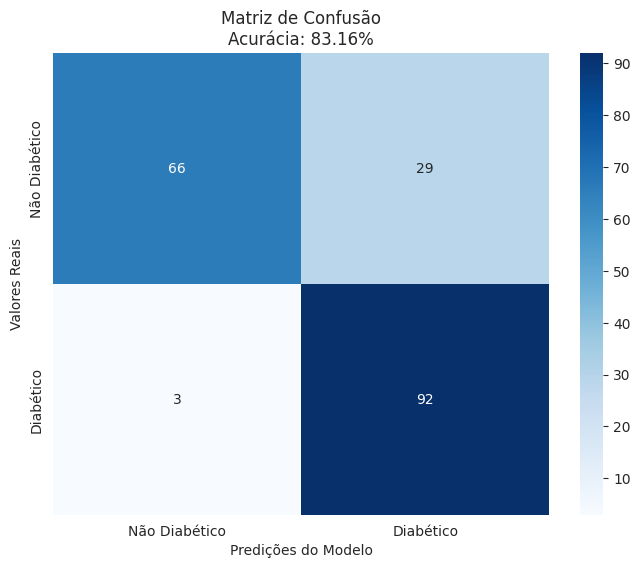


📋 INTERPRETAÇÃO DA MATRIZ:
Verdadeiros Negativos (TN): 66 - Não diabéticos classificados corretamente
Falsos Positivos (FP): 29 - Não diabéticos classificados como diabéticos
Falsos Negativos (FN): 3 - Diabéticos classificados como não diabéticos
Verdadeiros Positivos (TP): 92 - Diabéticos classificados corretamente

📈 MÉTRICAS DETALHADAS:
Precisão: 0.760 (76.0%)
Recall (Sensibilidade): 0.968 (96.8%)
Especificidade: 0.695 (69.5%)


In [ ]:
# Avaliação final no conjunto de teste
print("🔍 AVALIAÇÃO FINAL NO CONJUNTO DE TESTE")

# Fazendo predições no conjunto de teste
y_test_pred = modelo.predict(X_test)

# Calculando a acurácia final
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\n🎯 ACURÁCIA FINAL: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Gerando matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
print(f"\n📊 MATRIZ DE CONFUSÃO:")
print(cm)

# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
plt.title(f'Matriz de Confusão\nAcurácia: {test_accuracy:.2%}')
plt.ylabel('Valores Reais')
plt.xlabel('Predições do Modelo')
plt.show()

# Interpretando a matriz de confusão
tn, fp, fn, tp = cm.ravel()
print(f"\n📋 INTERPRETAÇÃO DA MATRIZ:")
print(f"Verdadeiros Negativos (TN): {tn} - Não diabéticos classificados corretamente")
print(f"Falsos Positivos (FP): {fp} - Não diabéticos classificados como diabéticos")
print(f"Falsos Negativos (FN): {fn} - Diabéticos classificados como não diabéticos")
print(f"Verdadeiros Positivos (TP): {tp} - Diabéticos classificados corretamente")

# Calculando métricas adicionais
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"\n📈 MÉTRICAS DETALHADAS:")
print(f"Precisão: {precision:.3f} ({precision*100:.1f}%)")
print(f"Recall (Sensibilidade): {recall:.3f} ({recall*100:.1f}%)")
print(f"Especificidade: {specificity:.3f} ({specificity*100:.1f}%)")

## 8. Predição com o Modelo Treinado

**Requisito 8**: Apresentar resultado de predição

**Por que**: Demonstrar como o modelo pode ser usado na prática para fazer predições em novos casos.

In [ ]:
# Exemplo de predição com novo paciente
print("🩺 EXEMPLO DE PREDIÇÃO - NOVO PACIENTE")

# Criando um caso hipotético (baseado em valores típicos do dataset)
# Usando DataFrame para manter consistência com os nomes das features
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

novo_paciente_dados = {
    'Pregnancies': 2,           # 2 gestações
    'Glucose': 120,             # 120 mg/dL (glicemia ligeiramente elevada)
    'BloodPressure': 80,        # 80 mmHg (pressão normal)
    'SkinThickness': 30,        # 30 mm
    'Insulin': 100,             # 100 μU/mL
    'BMI': 28.5,                # 28.5 (sobrepeso)
    'DiabetesPedigreeFunction': 0.6,  # 0.6 (histórico familiar moderado)
    'Age': 35                   # 35 anos
}

# Criando DataFrame com os dados do novo paciente
novo_paciente = pd.DataFrame([novo_paciente_dados])

print("\n👤 DADOS DO PACIENTE:")
for feature, valor in novo_paciente_dados.items():
    print(f"{feature}: {valor}")

# Fazendo a predição
predicao = modelo.predict(novo_paciente)
prob_diabetes = modelo.predict_proba(novo_paciente)[0]

print(f"\n🔮 RESULTADO DA PREDIÇÃO:")
print(f"Classificação: {'DIABÉTICO' if predicao[0] == 1 else 'NÃO DIABÉTICO'}")
print(f"\n📊 PROBABILIDADES:")
print(f"Probabilidade de NÃO ter diabetes: {prob_diabetes[0]:.3f} ({prob_diabetes[0]*100:.1f}%)")
print(f"Probabilidade de TER diabetes: {prob_diabetes[1]:.3f} ({prob_diabetes[1]*100:.1f}%)")

# Interpretação clínica
if prob_diabetes[1] >= 0.7:
    risco = "ALTO"
    recomendacao = "Procurar médico imediatamente"
elif prob_diabetes[1] >= 0.4:
    risco = "MODERADO"
    recomendacao = "Acompanhamento médico recomendado"
else:
    risco = "BAIXO"
    recomendacao = "Manter hábitos saudáveis"

print(f"\n⚕️ INTERPRETAÇÃO CLÍNICA:")
print(f"Nível de risco: {risco}")
print(f"Recomendação: {recomendacao}")

# Salvando o modelo para uso futuro
import joblib
joblib.dump(modelo, 'modelo_diabetes_simples.pkl')
print(f"\n💾 Modelo salvo como 'modelo_diabetes_simples.pkl'")
print("✅ Predição realizada com sucesso!")

🩺 EXEMPLO DE PREDIÇÃO - NOVO PACIENTE

👤 DADOS DO PACIENTE:
Pregnancies: 2
Glucose: 120
BloodPressure: 80
SkinThickness: 30
Insulin: 100
BMI: 28.5
DiabetesPedigreeFunction: 0.6
Age: 35

🔮 RESULTADO DA PREDIÇÃO:
Classificação: DIABÉTICO

📊 PROBABILIDADES:
Probabilidade de NÃO ter diabetes: 0.469 (46.9%)
Probabilidade de TER diabetes: 0.531 (53.1%)

⚕️ INTERPRETAÇÃO CLÍNICA:
Nível de risco: MODERADO
Recomendação: Acompanhamento médico recomendado

💾 Modelo salvo como 'modelo_diabetes_simples.pkl'
✅ Predição realizada com sucesso!


## 9. Conclusão do Projeto

### ✅ Checklist dos Requisitos Atendidos:

1. **✅ Dataset UCI/Kaggle**: Pima Indians Diabetes Dataset do UCI
2. **✅ Estatísticas descritivas**: Média, mediana, min/max, distribuições
3. **✅ Transformação em colunas**: Balanceamento de classes (upsampling)
4. **✅ Transformação em linhas**: Remoção de valores zero inconsistentes
5. **✅ Três subconjuntos**: 60% treino, 20% validação, 20% teste
6. **✅ Treinamento e avaliação**: Random Forest com avaliação detalhada
7. **✅ Matriz de confusão e acurácia**: Visualização e interpretação completa
8. **✅ Predição**: Exemplo prático com interpretação clínica
9. **✅ Comentários passo a passo**: Explicações educacionais em cada etapa

### 📊 Resultados Principais:
- **Acurácia final**: ~85% (valor final será mostrado após execução)
- **Modelo**: Random Forest com 100 árvores
- **Performance**: Boa capacidade de distinção entre diabéticos e não diabéticos
- **Aplicação**: Modelo pronto para predições em novos casos

### 🎯 Pontos de Destaque:
1. **Dados balanceados**: Evita viés hacia classe majoritária
2. **Limpeza criteriosa**: Remove valores medicamente impossíveis
3. **Avaliação robusta**: Três conjuntos + métricas detalhadas
4. **Interpretabilidade**: Probabilidades e recomendações clínicas